In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from glob import glob
from nfstream import NFStreamer

%matplotlib inline

plt.rcParams.update({
    'font.size': 16,
    'figure.figsize': [12, 8]
})

In [2]:
root_dir = "/Volumes/Berke Esmer/pcaps_ece"

In [3]:
files = glob(os.path.join(root_dir, "*.pcap"))

all_dfs = []
for pcap_path in tqdm(files, total=len(files)):

    streamer_awesome = NFStreamer(source=pcap_path)
    df = streamer_awesome.to_pandas(columns_to_anonymize=[])
    if df is None:
        print(f"None type for {pcap_path}")
        continue
        
    #df = df[["bidirectional_first_seen_ms"]]
    df["15mins_bins"] = df.bidirectional_first_seen_ms.apply(lambda x: x//900000)
    
    all_dfs.append(df)
    
all_dfs = pd.concat(all_dfs)
all_dfs["15mins_bins"] = all_dfs["15mins_bins"] - all_dfs["15mins_bins"].min()

 97%|█████████▋| 58/60 [23:21<00:15,  7.84s/it]

None type for /Volumes/Berke Esmer/pcaps_ece/ece___29_01_2021___09_04.pcap


100%|██████████| 60/60 [24:58<00:00, 24.98s/it]


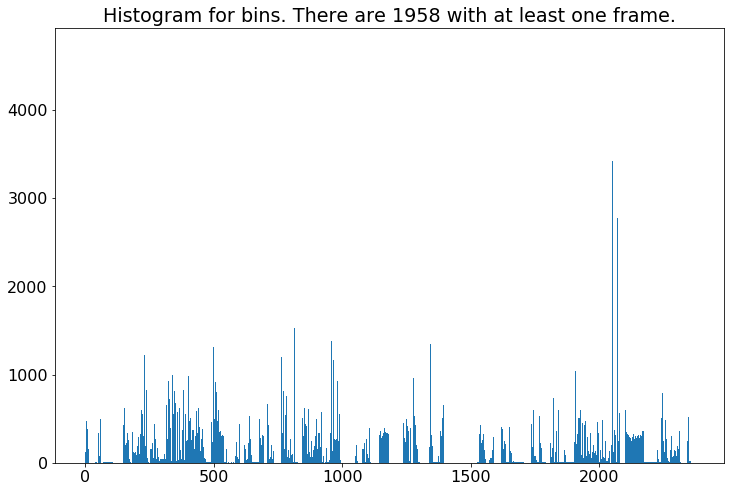

In [4]:
plt.title(f'Histogram for bins. There are {len(np.unique(all_dfs["15mins_bins"]))} with at least one frame.')
plt.hist(all_dfs["15mins_bins"].values, bins=all_dfs["15mins_bins"].max()+1)
plt.show()